# Project: Wrangling and Analyze Data

## Table of Content
<ul>
 <li><a href= '#datagathering'>Data Gathering</a></li>
 <li><a href= '#assessing'> Assessing Data</a></li>
 <li><a href= '#cleaning'>Cleaning Data</a></li>
 <li><a href= '#sorting'>Storing Data</a></li>
 <li><a href= '#eda'>Analyzing and Visualizing Data</a></li>    
</ul>

In [11]:
!pip install tweepy

  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0


conda 22.9.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.


In [1]:
# import library
import pandas as pd 
import requests
import os
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
#import tweepy
#from tweepy import OAuthHandler
#from timeit import default_timer as timer

<a id = 'datagathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read the twitter_archive_enhanced.csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# programmatically downloading the image file 
# from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
# read the image_predictions.tsv file
image_predictions = pd.read_csv('image_predictions.tsv','\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
'''
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:                   # had error therefore changed tweepy.TweepError to its correct form tweepy.errors.TweepyException
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitter_archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in th

In [5]:
# read the json text file line by line 
tweet_list = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)                                           # load each line as a json file
        tweet_id = tweet['id']                                             # scrap id from the json line
        retweet_count = tweet['retweet_count']                             # scrap retweet_count from the json line              
        favorite_count = tweet['favorite_count']                           # scrap favorite_count from the json line

        tweet_list.append({'tweet_id':tweet_id,                            # append each variables to tweet_list
                          'retweet_count':retweet_count,
                          'favorite_count':favorite_count})

tweet_json = pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favorite_count'])      # convert tweet_list to a dataframe tweet_json

<a id='assessing'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual Assessment

In [6]:
# visually assessing twitter_archive dataframe
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# visually assessing image_predictions dataframe
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
# visually assessing tweet_json dataframe
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Programmatic Assessment

In [9]:
# get information on twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# datatype of each columns
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [11]:
# look if there is any duplicated rows
twitter_archive.duplicated().sum()

0

In [12]:
# if there are columns containing null values
twitter_archive.columns[twitter_archive.isnull().any()]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls'],
      dtype='object')

In [13]:
# check if there are replay and retweeted values, since these are not needed
print(twitter_archive.retweeted_status_id.notna().value_counts(),'\n')
print(twitter_archive.retweeted_status_user_id.notna().value_counts(),'\n')
print(twitter_archive.retweeted_status_timestamp.notna().value_counts(),'\n')

print(twitter_archive.in_reply_to_status_id.notna().value_counts(),'\n')
print(twitter_archive.in_reply_to_user_id .notna().value_counts(),'\n')

False    2175
True      181
Name: retweeted_status_id, dtype: int64 

False    2175
True      181
Name: retweeted_status_user_id, dtype: int64 

False    2175
True      181
Name: retweeted_status_timestamp, dtype: int64 

False    2278
True       78
Name: in_reply_to_status_id, dtype: int64 

False    2278
True       78
Name: in_reply_to_user_id, dtype: int64 



In [14]:
# make sure these columns don't have duplicates
print(twitter_archive.tweet_id.duplicated().value_counts())
print(twitter_archive.expanded_urls.duplicated().value_counts())                 # 137 row are duplicated,needs to be removed      

False    2356
Name: tweet_id, dtype: int64
False    2219
True      137
Name: expanded_urls, dtype: int64


In [15]:
# get information on image_predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# datatype of each columns
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [17]:
# look if there is any duplicated rows
image_predictions.duplicated().value_counts()

False    2075
dtype: int64

In [18]:
# make sure these columns don't have duplicates
print(image_predictions.tweet_id.duplicated().sum())
print(image_predictions.jpg_url.duplicated().sum())                       # 66 duplicated values, needs to be removed

0
66


In [19]:
# if there are columns containing null values
image_predictions.columns[image_predictions.isnull().any()]

Index([], dtype='object')

In [20]:
# check if breed name has the same format
image_predictions.p1.sample(7)

612            Maltese_dog
440      Brabancon_griffon
1029        French_bulldog
1934    Labrador_retriever
1085    Labrador_retriever
744       English_springer
1008             Chihuahua
Name: p1, dtype: object

In [21]:
# how many tweet_ids have images, since we don't want tweets without images. 
twitter_archive.tweet_id.isin(image_predictions.tweet_id).value_counts()                   # 281 tweets doesn't have images

True     2075
False     281
Name: tweet_id, dtype: int64

In [22]:
# get information on tweet_json
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
# datatype of each columns
tweet_json.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [24]:
# check if there are duplicated tweet_id values, since there could be tweets with equal retweet and favorite count values.
tweet_json.tweet_id.duplicated().sum()

0

In [25]:
# check if all tweet_ids in tweet_json are in twitter archive
tweet_json.tweet_id.isin(twitter_archive.tweet_id).value_counts()

True    2354
Name: tweet_id, dtype: int64

### Quality issues

1. [Missing Value in expanded_url](#issue1) 

2. [Rating numerator less than 10 and greater than 15](#issue2)

3. [Rating Denominator less than 10](#issue3)

4. [name column contains only one or two letters (a,an,the)](#issue4)

5. [timestamp datatype is object](#issuetidy3)

6. [78 reply status in twitter_archive](#issue6)

7. [181 retweeted status in twitter_archive](#issue7)

8. [Nan values is used instead of 0 in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp](#issue8)

9. [nondescript column name(P1,P1_conf,P1_dog,P2,P2_conf,P2_dog,P3,P3_conf and P3_dog(image_predictions)](#issue9)

10. [Inconsistent use of capitalization in dog breed names](#issue10)
 
11. [contains video urls](#issue11)

12. [duplicated jpg_urls](#issue12)

13. [duplicated expanded_urls values](#issue13)

14. [281 tweets without image](#issue14)


### Tidiness issues
1.  [timestamp contains date and time](#issuetidy1)

2.  [values are treated as varibles(dog stages are stated as column names)](#issuetidy2)

3.  [timestamps(date) beyond August 1st, 2017](#issuetidy3)

4.  [tweet_json is on its own one dataframe, rather than merging with twitter_archive](#issuetidy4)


<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [7]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Quality

<a id = 'issue1'></a>
### Issue #1: Missing Value in expanded_url

#### Define: Fill the missing values in twitter_archive expanded_url by looking into if any of these values have images

#### Code

In [8]:
# check if fields with missing expanded urls are those field with no image
null_expanded_urls = twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()].tweet_id
print(len(null_expanded_urls))                                                                      # number of null values 
null_expanded_urls.isin(image_predictions_clean.tweet_id).value_counts()                            # tweet_ids with null expanded urls are not found in image_predictions_clean 

59


False    59
Name: tweet_id, dtype: int64

In [9]:
# since the data should only contain original tweets that have images, remove tweet_ids in null_expanded_urls 
null_expanded_urls_index = null_expanded_urls.index
twitter_archive_clean.drop(index = null_expanded_urls_index,inplace = True)                   

#### Test

In [10]:
# check if there are any null expanded_url values
twitter_archive_clean.expanded_urls.isnull().sum()

0

### Tidy

<a id = 'issuetidy1'></a>
### Issue #1: timestamp contains both date and time

#### Define: separate the date and time in timestamp into one column each, using regular expression and extract method

#### Code

In [11]:
# look into the format of timestamp 
twitter_archive_clean.timestamp.sample(5)

595     2016-11-16 01:39:30 +0000
562     2016-11-26 19:50:26 +0000
1261    2016-03-16 17:18:07 +0000
568     2016-11-25 16:22:55 +0000
609     2016-11-12 21:02:38 +0000
Name: timestamp, dtype: object

In [12]:
# create two columns named tweet_date and tweet_time for the separated date and time values.
twitter_archive_clean['tweet_date'] = twitter_archive_clean.timestamp.str.extract('(\d{4}\-\d{2}\-\d{2})',expand=True)
twitter_archive_clean['tweet_time'] = twitter_archive_clean.timestamp.str.extract('(\d{2}:\d{2}:\d{2})',expand=True) 

In [13]:
# remove column timestamp
twitter_archive_clean.drop('timestamp',axis = 1,inplace = True)

#### Test

In [14]:
# check colulmn timestamp is removed from the table
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
tweet_date                    2297 non-null object
tweet_time                    22

In [15]:
# display sample of date and time
print(twitter_archive_clean.tweet_date.sample(3))
print(twitter_archive_clean.tweet_time.sample(3))

1918    2015-12-08
1177    2016-04-12
345     2017-02-15
Name: tweet_date, dtype: object
2156    19:25:57
742     18:38:05
604     17:54:59
Name: tweet_time, dtype: object


<a id = 'issuetidy2'></a>
### Issue #2: values are treated as variables(dog stages are stated as column names)

#### Define: Change the dog stages doggo,floofer,pupper and puppo from column names to row values by adding new column to specify one or two dog stage value for each row.

#### Code

In [16]:
dog_stage = twitter_archive_clean.iloc[:,12:16]                                   # contains doggo,floofer,pupper and puppo columns
def new_column(row):                                                              # function to add row values to the new column
    if (row.doggo != 'None'):                                                     # if row value of doggo is not none check for the other dog stages
        if (row.floofer != 'None'):                                               # if row value floofer is not none return the string 'doggo and floofer'
            return row.doggo + ' and ' + row.floofer

        elif (row.pupper != 'None'):                                              # if row value pupper is not none return the string 'doggo and pupper'
            return row.doggo + ' and ' + row.pupper

        elif (row.puppo != 'None'):                                               # if row value puppo is not none return the string 'doggo and puppo'
            return row.doggo + ' and ' + row.puppo          

        else:                                                                     # else return the string 'doggo'
            return row.doggo

    elif (row.floofer != 'None'):                                                 # if row value of floofer is not none check for the other dog stages
        if(row.pupper != 'None'):                                                 # if row value pupper is not none return the string 'floofer and pupper'
            return row.floofer + ' and ' + row.pupper          

        elif (row.puppo != 'None'):                                               # if row value puppo is not none return the string 'floofer and puppo'
            return row.floofer + ' and ' + row.puppo

        else:                                                                     # else return the string 'floofer'
            return row.floofer

    elif (row.pupper != 'None'):                                                  # if row value of pupper is not none check for the other dog stages  
        if (row.puppo != 'None'):                                                 # if row value puppo is not none return the string 'pupper and puppo'
            return row.pupper + ' and ' + row.puppo

        else:                                                                     # else return the string 'pupper'            
            return row.pupper
    elif (row.puppo != 'None'):                                                   # if only row value of puppo is not none return the string 'puppo'
        return row.puppo

    else:                                                                         # else return Nan
        return 'Not Provided'

In [17]:
# add the dog_stage column to twitter_archive_clean     
twitter_archive_clean['dog_stage'] = dog_stage.apply(lambda row: new_column(row), axis=1) 

In [18]:
# remove column doggo,floofer,pupper and puppo
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1,inplace = True)

#### Test

In [19]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
tweet_date                    2297 non-null object
tweet_time                    2297 non-null object
dog_stage                     2297 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 287.1+ KB


<a id = 'issuetidy3'></a>
### Issue #3: timestamps(date) beyond August 1st, 2017
> But first deal with **timestamp datatype is object**, *Quality Issue 5*

#### Define: Drop values beyound August 1st, 2017, but before that need to change the datatype of tweet_date and tweet_time into datetime

#### Code

In [20]:
# change data type of tweet_date and tweet_time from string to datetime
twitter_archive_clean.tweet_date = pd.to_datetime(twitter_archive_clean.tweet_date, format = '%Y-%m-%d')
twitter_archive_clean.tweet_time = pd.to_datetime(twitter_archive_clean.tweet_time)

In [21]:
# remove rows with values beyound August 1st 2017
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean.tweet_date <= '2017-08-01']

#### Test

In [22]:
# check if the dataframe contains data beyound August 1st,2017
twitter_archive_clean.loc[twitter_archive_clean.tweet_date > '2017-08-01']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,tweet_date,tweet_time,dog_stage


<a id = 'issuetidy4'></a>
### Issue #4: tweet_json is on its own one dataframe, rather than merging with twitter_archive

#### Define: merge tweet_json with twitter_archive using merge() method

#### Code

In [23]:
# inner merge twitter_archive_clean dataframe with tweet_json
twitter_archive_clean = twitter_archive_clean.merge(tweet_json_clean, how='inner')

#### Test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2294
Data columns (total 17 columns):
tweet_id                      2295 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        2295 non-null object
text                          2295 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2295 non-null int64
rating_denominator            2295 non-null int64
name                          2295 non-null object
tweet_date                    2295 non-null datetime64[ns]
tweet_time                    2295 non-null datetime64[ns]
dog_stage                     2295 non-null object
retweet_count                 2295 non-null int64
favorite_count                2295 non-null int64
dtypes: datetime64

###  Quality

<a id = 'issue2'></a>
### Issue #2: Rating numerator less than 10 and greater than 15

#### Define:  For accuracy update numbers less 5 by adding 10, change rating_numerator values between 5 and 10 into 5 then add 10 and those greater than 15 to be equal to 15. Using a function and apply() method.

#### Code

In [25]:
# 15/10 is highest rating any dog has ever received on WeRateDogs, therefore any rating numerator greater than 15 is inaccurate.
def updating_numerator(row):
    if (row > 5)  and (row < 10):                             # if value is between 5 and 10, convert it to 5 then add 10.
        row = 5
        return row + 10 
    elif row <= 5:                                            # if value is less than 5, just add 10.
        return row + 10
    elif row > 15:                                            # if value is greater than 15 change row value to 15(15/10 is the maximum rating in WeRateDogs)
        return 15
    else:                                                     # if value is between 10 and 15, return the value itself.
        return row

In [26]:
# call function updating_numerator and assign return values to the rating numberator 
twitter_archive_clean.rating_numerator = twitter_archive_clean['rating_numerator'].apply(lambda row: updating_numerator(row))

#### Test

In [27]:
# check if there are values beyound 15 and less than 10.
print(len(twitter_archive_clean[twitter_archive_clean['rating_numerator'] < 10].index))
print(len(twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].index))

0
0


<a id = 'issue3'></a>
### Issue #3: Rating Denominator less than 10

#### Defiine: assign 10 to denominator ratings different than 10 using a function and apply() method

#### Code

In [28]:
# denominator having value different than 10 are set to 10
def updating_denominator(row):
    if (row < 10) or (row > 10):                                 # if row > 10 or row < 10, updated the row value to 10.
        return 10
    else:
        return row

In [29]:
# call function updating_denominator and assign return values to the rating denominator
twitter_archive_clean.rating_denominator = twitter_archive_clean['rating_denominator'].apply(lambda row: updating_denominator(row))

#### Test

In [30]:
# check if there are any tweets with rating_denominator different than 10
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,tweet_date,tweet_time,dog_stage,retweet_count,favorite_count


<a id = 'issue4'></a>
### Issue #4: name column contains only one or two letters (a,an,the) 

#### Define: check if I could find the name from the tweets, if not change this values to None.

#### Code

In [31]:
# get all index with confusing name
twitter_archive_clean.name = twitter_archive_clean.name.apply(str.lower)                 # change every name to lower case

a_name_index = twitter_archive_clean[twitter_archive_clean.name == 'a'].index
an_name_index = twitter_archive_clean[twitter_archive_clean.name == 'an'].index
the_name_index = twitter_archive_clean[twitter_archive_clean.name == 'the'].index

wrong_name_index = list(a_name_index) + list(an_name_index) + list(the_name_index)

# set all wrong names to none
for i in wrong_name_index:
    twitter_archive_clean.at[i,'name'] = 'None'

#### Test

In [32]:
# check if name contain a,an and the
print(twitter_archive_clean[twitter_archive_clean.name == 'a'].index)
print(twitter_archive_clean[twitter_archive_clean.name == 'an'].index)
print(twitter_archive_clean[twitter_archive_clean.name == 'the'].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


<a id = 'issue6'></a>
### Issue #6: 78 reply status in twitter_archive

#### Define: drop rows containing reply status using drop()

#### Code

In [34]:
# get the index replied tweets
INDEX = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()].index

In [35]:
# remove the above index 
twitter_archive_clean.drop(index = INDEX,axis = 1,inplace = True)

#### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2272 entries, 0 to 2294
Data columns (total 17 columns):
tweet_id                      2272 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
source                        2272 non-null object
text                          2272 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
expanded_urls                 2272 non-null object
rating_numerator              2272 non-null int64
rating_denominator            2272 non-null int64
name                          2272 non-null object
tweet_date                    2272 non-null datetime64[ns]
tweet_time                    2272 non-null datetime64[ns]
dog_stage                     2272 non-null object
retweet_count                 2272 non-null int64
favorite_count                2272 non-null int64
dtypes: datetime64[n

<a id = 'issue7'></a>
### Issue #7: 181 retweeted status in twitter_archive

#### Define: remove all retweeted data using drop method

#### Code

In [50]:
# get the index of retweeted data
retweeted_index_id = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull() == True].index
retweeted_index_user_id = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.notnull() == True].index
retweeted_index_timestamp = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.notnull() == True].index

index_to_be_deleted= list(retweeted_index_id) + list(retweeted_index_user_id) + list(retweeted_index_timestamp)

In [53]:
# deleted all retweeted data
twitter_archive_clean.drop(index = index_to_be_deleted,axis = 1, inplace = True)

#### Test

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2294
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
tweet_date                    2094 non-null datetime64[ns]
tweet_time                    2094 non-null datetime64[ns]
dog_stage                     2094 non-null object
retweet_count                 2094 non-null int64
favorite_count                2094 non-null int64
dtypes: datetime64[ns](2),

<a id = 'issue8'></a>
### Issue #8: Nan values is used instead of 0 in in_reply_to_status_id, in_reply_to_user_id,   retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp

#### Define: change Nan value to zero

#### Code

In [55]:
# to make sure only columns stated in the assessment section contains null values
twitter_archive_clean.columns[twitter_archive_clean.isnull().any()]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp'],
      dtype='object')

In [56]:
# fill all nan values with zero(0)
twitter_archive_clean.fillna(0,inplace = True)

#### Test

In [57]:
# check if there are any columns with null values
twitter_archive_clean.columns[twitter_archive_clean.isnull().any()]

Index([], dtype='object')

<a id = 'issue9'></a>
### Issue #9: nondescript column name(p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf and p3_dog)

#### Define: change the name of p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf and p3_dog  using rename() method

#### Code

In [58]:
# rename columns mentioned above
image_predictions_clean = image_predictions_clean.rename(columns = {'p1':'first_prediction','p1_conf':'first_prediction_confidence','p1_dog':'first_prediction_dog_breed','p2':'second_prediction','p2_conf':'second_prediction_confidence','p2_dog':'second_prediction_dog_breed','p3':'third_prediction','p3_conf':'third_prediction_confidence','p3_dog':'third_prediction_dog_breed'})

#### Test

In [59]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2075 non-null int64
jpg_url                         2075 non-null object
img_num                         2075 non-null int64
first_prediction                2075 non-null object
first_prediction_confidence     2075 non-null float64
first_prediction_dog_breed      2075 non-null bool
second_prediction               2075 non-null object
second_prediction_confidence    2075 non-null float64
second_prediction_dog_breed     2075 non-null bool
third_prediction                2075 non-null object
third_prediction_confidence     2075 non-null float64
third_prediction_dog_breed      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id = 'issue10'></a>
### Issue #10: Inconsistent use of capitalization in dog breed names

#### Define: using str.lower() method change every breed name to lower case

#### Code

In [60]:
# change names to lower case
image_predictions_clean.first_prediction = image_predictions_clean.first_prediction.str.lower()
image_predictions_clean.second_prediction = image_predictions_clean.second_prediction.str.lower()
image_predictions_clean.third_prediction = image_predictions_clean.third_prediction.str.lower()

#### Test

In [61]:
# check sample of breed names if there are inconsistant
print(image_predictions_clean.first_prediction.sample(5),'\n')
print(image_predictions_clean.second_prediction.sample(5),'\n')
print(image_predictions_clean.third_prediction.sample(5),'\n')

1055              collie
1394                chow
1180            keeshond
1877    golden_retriever
197          maltese_dog
Name: first_prediction, dtype: object 

1351                vizsla
434     american_alligator
815         siberian_husky
1634      golden_retriever
677                   chow
Name: second_prediction, dtype: object 

2024      golden_retriever
771               papillon
606             lumbermill
10      labrador_retriever
917     australian_terrier
Name: third_prediction, dtype: object 



<a id = 'issue11'></a>
### Issue #11: contain video urls

#### Define: remove all urls beside .jpg using drop() and regular expressions.

#### Code

In [62]:
# find indexs not matching the regular expression of the image urls
video_index = image_predictions_clean.jpg_url[image_predictions_clean.jpg_url.str.match(pat = 'https\:\/\/pbs\.twimg\.com\/media.*\.jpg') == False].index

In [63]:
# delete all the above indexes
image_predictions_clean.drop(index = video_index,axis = 1,inplace = True)

#### Test

In [64]:
# check if there are any video urls 
image_predictions_clean.jpg_url[image_predictions_clean.jpg_url.str.match(pat = 'https\:\/\/pbs\.twimg\.com\/media.*\.jpg') == False].index

Int64Index([], dtype='int64')

<a id = 'issue12'></a>
### Issue #12: duplicated jpg_urls

#### Define: drop duplicated image urls using drop()

#### Code

In [65]:
# delete duplicated jpg_url using drop_duplicates()
image_predictions_clean.jpg_url.drop_duplicates(inplace = True)

#### Test

In [66]:
image_predictions_clean.jpg_url.duplicated().sum()

0

<a id = 'issue13'></a>
### Issue #13: duplicated expanded_urls values

#### Define: delete duplicated expanded_urls rows

#### Code

In [67]:
# delete all duplicated values of expanded_urls
twitter_archive_clean.expanded_urls.drop_duplicates(inplace = True)

#### Test

In [68]:
twitter_archive_clean.expanded_urls.duplicated().sum()

0

<a id = 'issue14'></a>
### Issue #14: 281 tweets without image

#### Define: remove these tweets using drop() method

#### Code

In [69]:
# get the index of tweets without image
no_image_tweets = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id) == False].index

In [70]:
# remove the above indexs
twitter_archive_clean.drop(index = no_image_tweets,axis = 1,inplace = True)

#### Test

In [71]:
twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id).value_counts()

True    1896
Name: tweet_id, dtype: int64

<a id='sorting'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
# remove columns with 0 values since they don't have any significance
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1,inplace = True)

In [77]:
# inner merge the twitter_archive_clean and image_predictions_clean
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, how='inner')

In [78]:
# export dataframe to twitter_archive_master
twitter_archive_clean.to_csv('twitter_archive_master.csv',index = False)

<a id='eda'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

> Question
- Which breed has the most highest rating using the first prediction?
- Which breed has the most lowest rating using the first prediction?
- Which breed has the highest favorite count?
- Which breed has the highest retweet count?
- How many dogs have high and low ratings?

In [79]:
# read the twitter_archive_master and image_predictions_master csv files
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 23 columns):
tweet_id                        1896 non-null int64
source                          1896 non-null object
text                            1896 non-null object
expanded_urls                   1896 non-null object
rating_numerator                1896 non-null int64
rating_denominator              1896 non-null int64
name                            1896 non-null object
tweet_date                      1896 non-null object
tweet_time                      1896 non-null object
dog_stage                       1896 non-null object
retweet_count                   1896 non-null int64
favorite_count                  1896 non-null int64
jpg_url                         1896 non-null object
img_num                         1896 non-null int64
first_prediction                1896 non-null object
first_prediction_confidence     1896 non-null float64
first_prediction_dog_breed      1896 non-null bool

In [80]:
print(twitter_archive_master.first_prediction_confidence .mean())
print(twitter_archive_master.second_prediction_confidence .mean())
print(twitter_archive_master.third_prediction_confidence .mean())

0.6010963569620255
0.1336818845232665
0.05942896517751636


**Which breed has the highest rating using the first prediction?**

In [81]:
prediction_highest = []                                                                       # create a list
id_high = twitter_archive_master[twitter_archive_master.rating_numerator == 15].index         # id contains all rows index that have rating numerator equal to 15(maximum value)
for i in id_high:
    prediction_highest.append(twitter_archive_master.loc[i].first_prediction)                 # append first prediction of tweet_ids having 15 rating numerator 

In [82]:
# function to count breed with most highest rating
def breed_rating(List):
    frequency = Counter(List)   
    return frequency.most_common(1)[0][0]

In [83]:
print(breed_rating(prediction_highest))

chihuahua


**Which breed has the lowest rating using the first prediction?**

In [84]:
prediction_lowest = []                                                                       # create a list
id_low = twitter_archive_master[twitter_archive_master.rating_numerator == 10].index             # id contains all rows index that have rating numerator equal to 10(minimum value)
for i in id_low:
    prediction_lowest.append(twitter_archive_master.loc[i].first_prediction)               # append first prediction of tweet_ids 10 rating numerator 

In [85]:
print(breed_rating(prediction_lowest))

labrador_retriever


**Which breed has the highest favorite count?**

In [87]:
max_favorite_count = twitter_archive_master.favorite_count.max()                                                      # highest favorite count value
print('Maximum favorite count:',max_favorite_count,'\n')
max_favorite_count_id = twitter_archive_master[twitter_archive_master.favorite_count == max_favorite_count].tweet_id  # tweet_id of highest favorite count value
print(max_favorite_count_id,'\n')

favorite_breed_first_prediction = twitter_archive_master.loc[292].first_prediction           # breed name of the most favorite dog from the tweets using first prediction
favorite_breed_second_prediction = twitter_archive_master.loc[292].second_prediction         # breed name of the most favorite dog from the tweets using second prediction
favorite_breed_third_prediction = twitter_archive_master.loc[292].third_prediction           # breed name of the most favorite dog from the tweets using thid prediction

Maximum favorite count: 132810 

292    822872901745569793
Name: tweet_id, dtype: int64 



In [88]:
# print values
print(favorite_breed_first_prediction)
print(favorite_breed_second_prediction)
print(favorite_breed_third_prediction)

lakeland_terrier
labrador_retriever
irish_terrier


In [90]:
# check confidence of each prediction for the first breed
print(twitter_archive_master.loc[292].first_prediction_confidence)                # 0.19601500000000002  (19.6015%)
twitter_archive_master.loc[292].first_prediction_dog_breed                        # True

0.19601500000000002


True

In [92]:
# check confidence of each prediction for the second breed
print(twitter_archive_master.loc[292].second_prediction_confidence)               # 0.160329(16.0329%)
twitter_archive_master.loc[292].second_prediction_dog_breed                       # True

0.160329


True

In [93]:
# check confidence of each prediction for the third breed
print(twitter_archive_master.loc[292].third_prediction_confidence)                # 0.0691262(6.91262%)
twitter_archive_master.loc[292].third_prediction_dog_breed                        # True

0.0691262


True

**Which breed has the highest retweet count?**

In [97]:
max_retweet_count = twitter_archive_master.retweet_count.max()                                                                               # highest retweeted value           
print('Maximum retweeted count:',max_retweet_count,'\n')
max_retweet_count_id = twitter_archive_master[twitter_archive_master.retweet_count == max_retweet_count].tweet_id
print(max_retweet_count_id,'\n')

retweet_breed_first_prediction = twitter_archive_master.loc[292].first_prediction           # breed name of the most retweeted dog from the tweets using first prediction
retweet_breed_second_prediction = twitter_archive_master.loc[292].second_prediction         # breed name of the most retweeted dog from the tweets using second prediction
retweet_breed_third_prediction = twitter_archive_master.loc[292].third_prediction           # breed name of the most retweeted dog from the tweets using thid prediction

Maximum retweeted count: 48265 

292    822872901745569793
Name: tweet_id, dtype: int64 



In [98]:
# print values
print(retweet_breed_first_prediction)
print(retweet_breed_second_prediction)
print(retweet_breed_third_prediction)

lakeland_terrier
labrador_retriever
irish_terrier


In [100]:
# check confidence of each prediction for the first breed
print(twitter_archive_master.loc[292].first_prediction_confidence)                 # 0.19601500000000002  (19.6015%)
twitter_archive_master.loc[292].first_prediction_dog_breed                         # True

0.19601500000000002


True

In [101]:
# check confidence of each prediction for the second breed
print(twitter_archive_master.loc[292].second_prediction_confidence)               # 0.160329(16.0329%)
twitter_archive_master.loc[292].second_prediction_dog_breed                       # True

0.160329


True

In [103]:
# check confidence of each prediction for the third breed
print(twitter_archive_master.loc[292].third_prediction_confidence)                # 0.0691262(6.91262%)
twitter_archive_master.loc[292].third_prediction_dog_breed                        # True

0.0691262


True

**How many dogs have high and low ratings?**

In [104]:
rating = []
for i in range(len(twitter_archive_master)):
    rating.append(twitter_archive_master.rating_numerator[i] / twitter_archive_master.rating_denominator[i])      # list containing rating of each dogs
twitter_archive_master['rating'] = rating                                                                         # include this list as a new column in twitter_archive_master
twitter_archive_master.rating.value_counts()                                                                      # use value counts to group dogs based on rating

1.2    436
1.0    412
1.1    388
1.5    375
1.3    243
1.4     42
Name: rating, dtype: int64

### Insights:
1. **chihuahua** is a dog breed with the most highest rating.

2. **labrador_retriever** is the dog breed that got low ratings most of the time.

3. **lakeland_terrier**  favored dog breed one.

4. **lakeland_terrier** is also the most retweeted breed dog.

5. There are **412** dog breed with low rating and **375** breeds with low ratings.

### Visualization

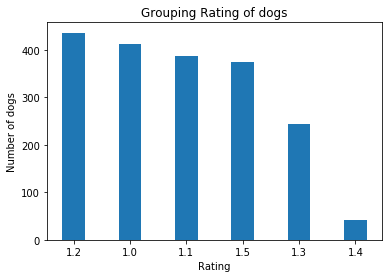

In [105]:
# plot 
y = twitter_archive_master.rating.value_counts()
x =[1,3,5,7,9,11]
plt.bar(x,y,tick_label=['1.2','1.0','1.1','1.5','1.3','1.4'])
plt.title('Grouping Rating of dogs')
plt.xlabel('Rating')
plt.ylabel('Number of dogs');